In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
import AHM
reload(AHM)
n=0
date = 300725

In [254]:
k = np.linspace(0, 2*np.pi, 40)

In [284]:
n+=1
da=1
db=0
dc=-1
mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, U=3, muB=2, mu=2, t=1, inhomp=False, inhomi=True)
vals = mM.Deltra(k, N=50, alpha=0.5)



0 (1, 0, -1)


c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:142: ComplexWarning: Casting complex values to real discards the imaginary part
  sortedEVals[sum(degen):sum(degen)+d]=inbet[t]


1 ((0.6253372949602537-2.3202997576641716e-20j), (0.004579018661395763+1.6360523734652702e-19j), (-0.6220312035617165+1.0339990384005627e-19j))
2 ((0.47735129923856084-3.6631655638333835e-20j), (0.00888786301378176-1.4693208568109956e-19j), (-0.47468354855281414-1.738373160404053e-19j))
3 ((0.3706896902528519+1.131985893783765e-19j), (0.011990544897796147+1.9576927243675605e-19j), (-0.3635087264472984+1.4854821070904409e-19j))
4 ((0.29546688274354876-1.64495072762942e-19j), (0.013074060942612532-2.0950039095431924e-19j), (-0.28242271742126057-2.326161361368272e-19j))
5 ((0.24381849515934206+2.784549430734892e-19j), (0.015156361703211964+2.6528668805126176e-19j), (-0.22148066855353526+3.486680613497456e-19j))
6 ((0.2073577473260924-4.2636255584302e-19j), (0.018310636204919586-3.696550015573484e-19j), (-0.1718595412450513-5.30582179450835e-19j))
7 ((0.18367565319868276+7.119662829296414e-19j), (0.02450594056696462+6.384655362742085e-19j), (-0.12882167298858407+8.108357579982717e-19j))
8 

In [285]:
dels = vals[0]
nus = vals[2]

In [286]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]


In [287]:
fol = f'calc{date}_{n}'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\scf\'"+fol

if not os.path.exists(newpath):
    os.makedirs(newpath)

filename = "parameters.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {dels[:,0]}, nA, nB, nC={nus[:,0]}, U={mM.U}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n dels: {dels}\nnus: {nus}")
    file.close

c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


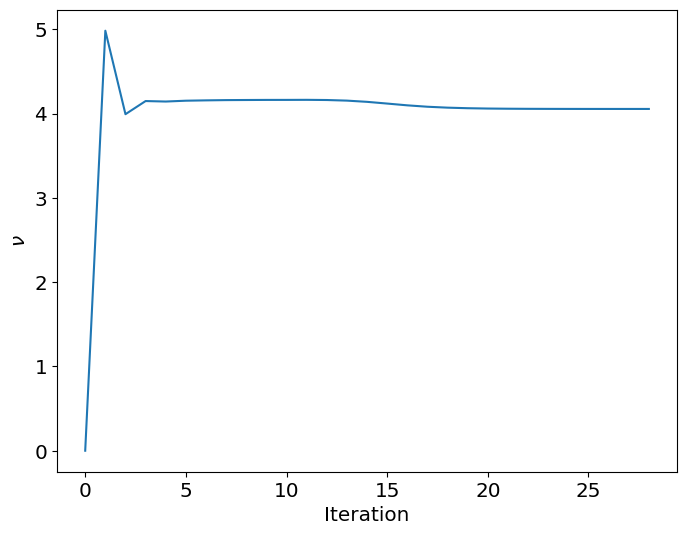

In [288]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(s1)), s1, label = r'no hopping')


#plt.legend()
plt.savefig(newpath+"//nu.png")
plt.show()

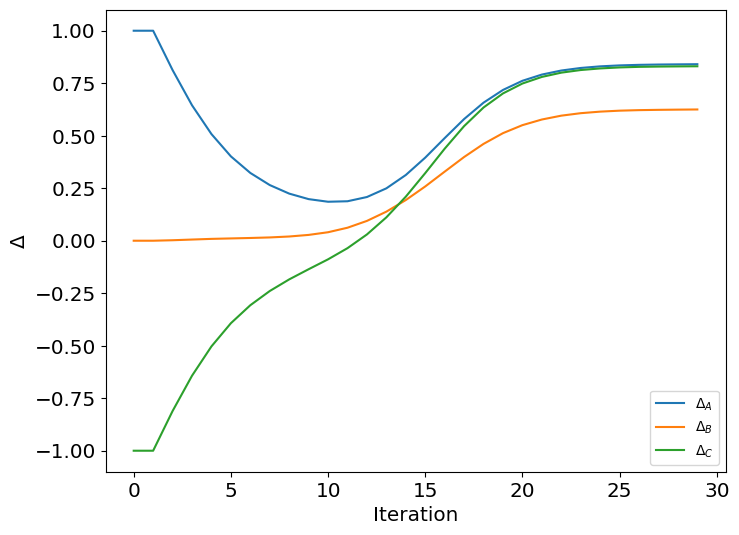

In [289]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')


plt.legend()
plt.savefig(newpath+"//dels.png")

plt.show()

In [290]:
da, db, dc = dels[:,-1]
na, nb, nc = nus[:,-1]
#mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc,mu=0, U=3, t=1, inhomp=False, inhomi=True)
H = mM.HBdG()
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

In [291]:
energies.T

array([[-3.91741479, -3.91741479, -1.95306077, ...,  1.95306077,
         3.91741479,  3.91741479],
       [-3.91671511, -3.91671511, -1.95240108, ...,  1.95240108,
         3.91671511,  3.91671511],
       [-3.91461786, -3.91461786, -1.95042388, ...,  1.95042388,
         3.91461786,  3.91461786],
       ...,
       [-3.91182175, -3.91182175, -1.94778706, ...,  1.94778706,
         3.91182175,  3.91182175],
       [-3.91601615, -3.91601615, -1.95174179, ...,  1.95174179,
         3.91601615,  3.91601615],
       [-3.91741479, -3.91741479, -1.95306077, ...,  1.95306077,
         3.91741479,  3.91741479]])

In [292]:
np.savetxt(newpath +"//dels.txt", dels, delimiter=",")
np.savetxt(newpath +"//nus.txt", nus, delimiter=",")
np.savetxt(newpath +"//energies.txt", energies, delimiter=",")

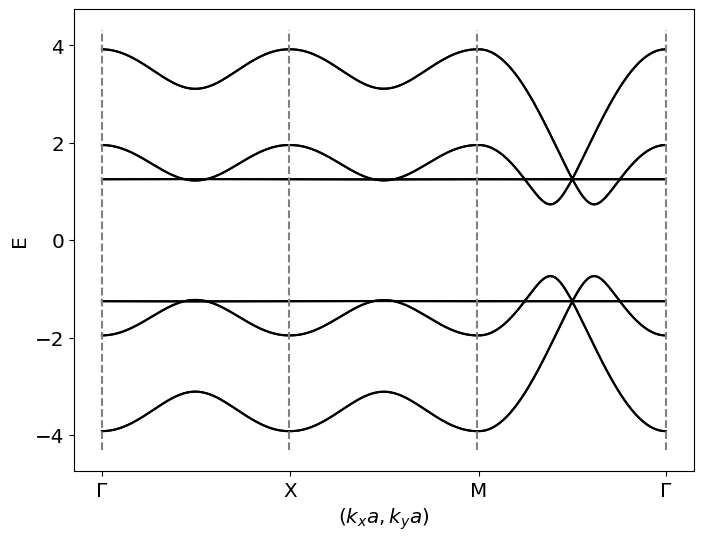

In [293]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
#plt.savefig("Pictures/ESCpath.png")
plt.savefig(newpath+"//bands.png")

plt.show()